In [ ]:
import pandas as pd
df=pd.read_excel('/content/alShortl.xls',header=0)
df.columns = df.iloc[0]
df = df[1:]
df.head()

,Project ID,Region,Country,Project Status,Last Stage Reached Name,Project Name,Project Development Objective,Implementing Agency,Consultant Services Required,Project URL,...,Grant Amount,Borrower,Lending Instrument,Environmental Assessment Category,Environmental and Social Risk,Sector 1,Sector 2,Sector 3,Theme 1,Theme 2
1,id,regionname,countryname,projectstatusdisplay,last_stage_reached_name,project_name,pdo,impagency,cons_serv_reqd_ind,url,...,grantamt,borrower,lendinginstr,envassesmentcategorycode,esrc_ovrl_risk_rate,sector1,sector2,sector3,theme1,theme2
2,P502565,Western and Central Africa,Republic of Liberia,Pipeline,NaN,RIGDPF,NaN,NaN,NaN,http://projects.worldbank.org/P502565/null?lan...,...,NaN,NaN,Development Policy Lending,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P502499,South Asia,Republic of India,Pipeline,NaN,Surat Resilience Enhancement Project,NaN,NaN,NaN,http://projects.worldbank.org/P502499/null?lan...,...,NaN,NaN,Investment Project Financing,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P502493,Latin America and Caribbean,Federative Republic of Brazil,Pipeline,NaN,RN Phase II,NaN,NaN,NaN,http://projects.worldbank.org/P502493/null?lan...,...,NaN,NaN,Investment Project Financing,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,P502492,Eastern and Southern Africa,Republic of Burundi,Pipeline,NaN,Access to Finance to Import Strategic Commodities,NaN,NaN,NaN,http://projects.worldbank.org/P502492/null?lan...,...,NaN,NaN,Investment Project Financing,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.columns

Index(['Project ID', 'Region', 'Country', 'Project Status',
       'Last Stage Reached Name', 'Project Name',
       'Project Development Objective ', 'Implementing Agency',
       'Consultant Services Required', 'Project URL', 'Board Approval Date',
       'Project Closing Date', 'Financing Type', 'Current Project Cost',
       'IBRD Commitment ', 'IDA Commitment', 'Total IDA and IBRD Commitment',
       'Grant Amount', 'Borrower', 'Lending Instrument',
       'Environmental Assessment Category', 'Environmental and Social Risk',
       'Sector 1', 'Sector 2', 'Sector 3', 'Theme 1', 'Theme 2'],
      dtype='object', name=0)

In [ ]:
df = df[df['Project Closing Date'] != 'closingdate']

In [ ]:
df['Project Closing Date'] = pd.to_datetime(df['Project Closing Date'], format='%m/%d/%Y %I:%M:%S %p')
df['Year'] = df['Project Closing Date'].dt.year
df['Month'] = df['Project Closing Date'].dt.month
df['Day'] = df['Project Closing Date'].dt.day
df['Hour'] = df['Project Closing Date'].dt.hour
df['Minute'] = df['Project Closing Date'].dt.minute
df['Second'] = df['Project Closing Date'].dt.second
df.set_index('Project Closing Date', inplace=True)

In [ ]:
df

,Project ID,Region,Country,Project Status,Last Stage Reached Name,Project Name,Project Development Objective,Implementing Agency,Consultant Services Required,Project URL,...,Sector 2,Sector 3,Theme 1,Theme 2,Year,Month,Day,Hour,Minute,Second
Project Closing Date,,,,,,,,,,,,,,,,,,,,,
NaT,P502565,Western and Central Africa,Republic of Liberia,Pipeline,NaN,RIGDPF,NaN,NaN,NaN,http://projects.worldbank.org/P502565/null?lan...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,P502499,South Asia,Republic of India,Pipeline,NaN,Surat Resilience Enhancement Project,NaN,NaN,NaN,http://projects.worldbank.org/P502499/null?lan...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,P502493,Latin America and Caribbean,Federative Republic of Brazil,Pipeline,NaN,RN Phase II,NaN,NaN,NaN,http://projects.worldbank.org/P502493/null?lan...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,P502492,Eastern and Southern Africa,Republic of Burundi,Pipeline,NaN,Access to Finance to Import Strategic Commodities,NaN,NaN,NaN,http://projects.worldbank.org/P502492/null?lan...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,P502491,South Asia,Republic of India,Pipeline,NaN,Haryana Clean Air and Sustainable Development ...,NaN,NaN,NaN,http://projects.worldbank.org/P502491/null?lan...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaT,P000019,Africa,Africa,Dropped,NaN,UEMOA Regional Financial Sector Project,NaN,NaN,NaN,http://projects.worldbank.org/P000019/null?lan...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-12-31,P000017,Africa,Africa,Closed,Bank Approved,Engineering and Technical Assistance Project,NaN,NaN,NaN,http://projects.worldbank.org/P000017/engineer...,...,NaN,NaN,Legal institutions for a market economy,Regional integration,1999.0,12.0,31.0,0.0,0.0,0.0
1997-12-31,P000010,Africa,Africa,Closed,NaN,Regional Development Project (03),NaN,NaN,NaN,http://projects.worldbank.org/P000010/null?lan...,...,"Other Agriculture, Fishing and Forestry",Other Transportation,Environmental policies and institutions,Other financial and private sector development,1997.0,12.0,31.0,0.0,0.0,0.0


In [ ]:
grouped_df = df.groupby('Year')['Grant Amount'].sum().reset_index()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

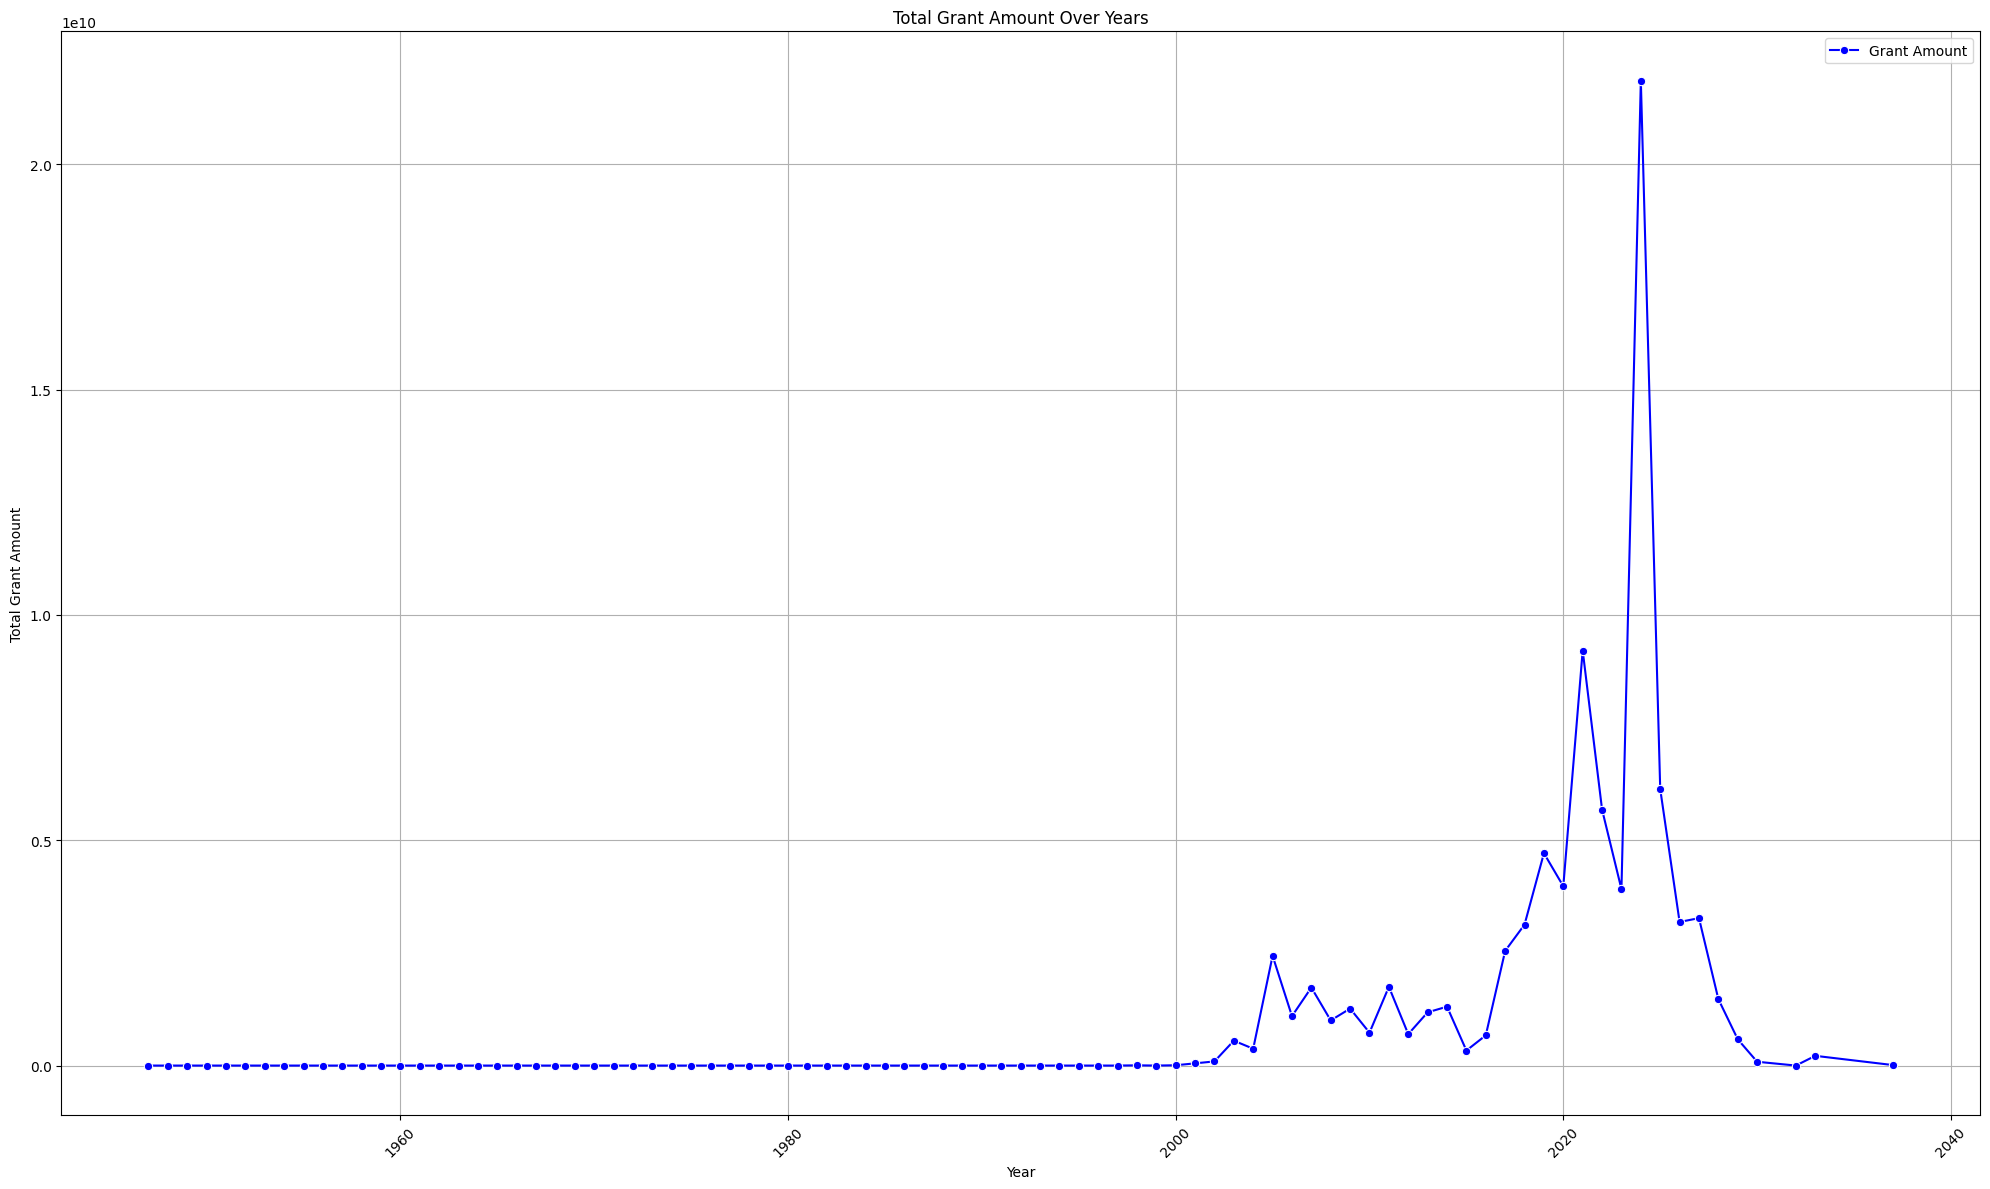

In [ ]:
plt.figure(figsize=(20, 12))
sns.lineplot(data=grouped_df, x='Year', y='Grant Amount', marker='o', color='b', label='Grant Amount')
plt.title('Total Grant Amount Over Years')
plt.xlabel('Year')
plt.ylabel('Total Grant Amount')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
grouped_df2 = df.groupby('Month')['Grant Amount'].sum().reset_index()

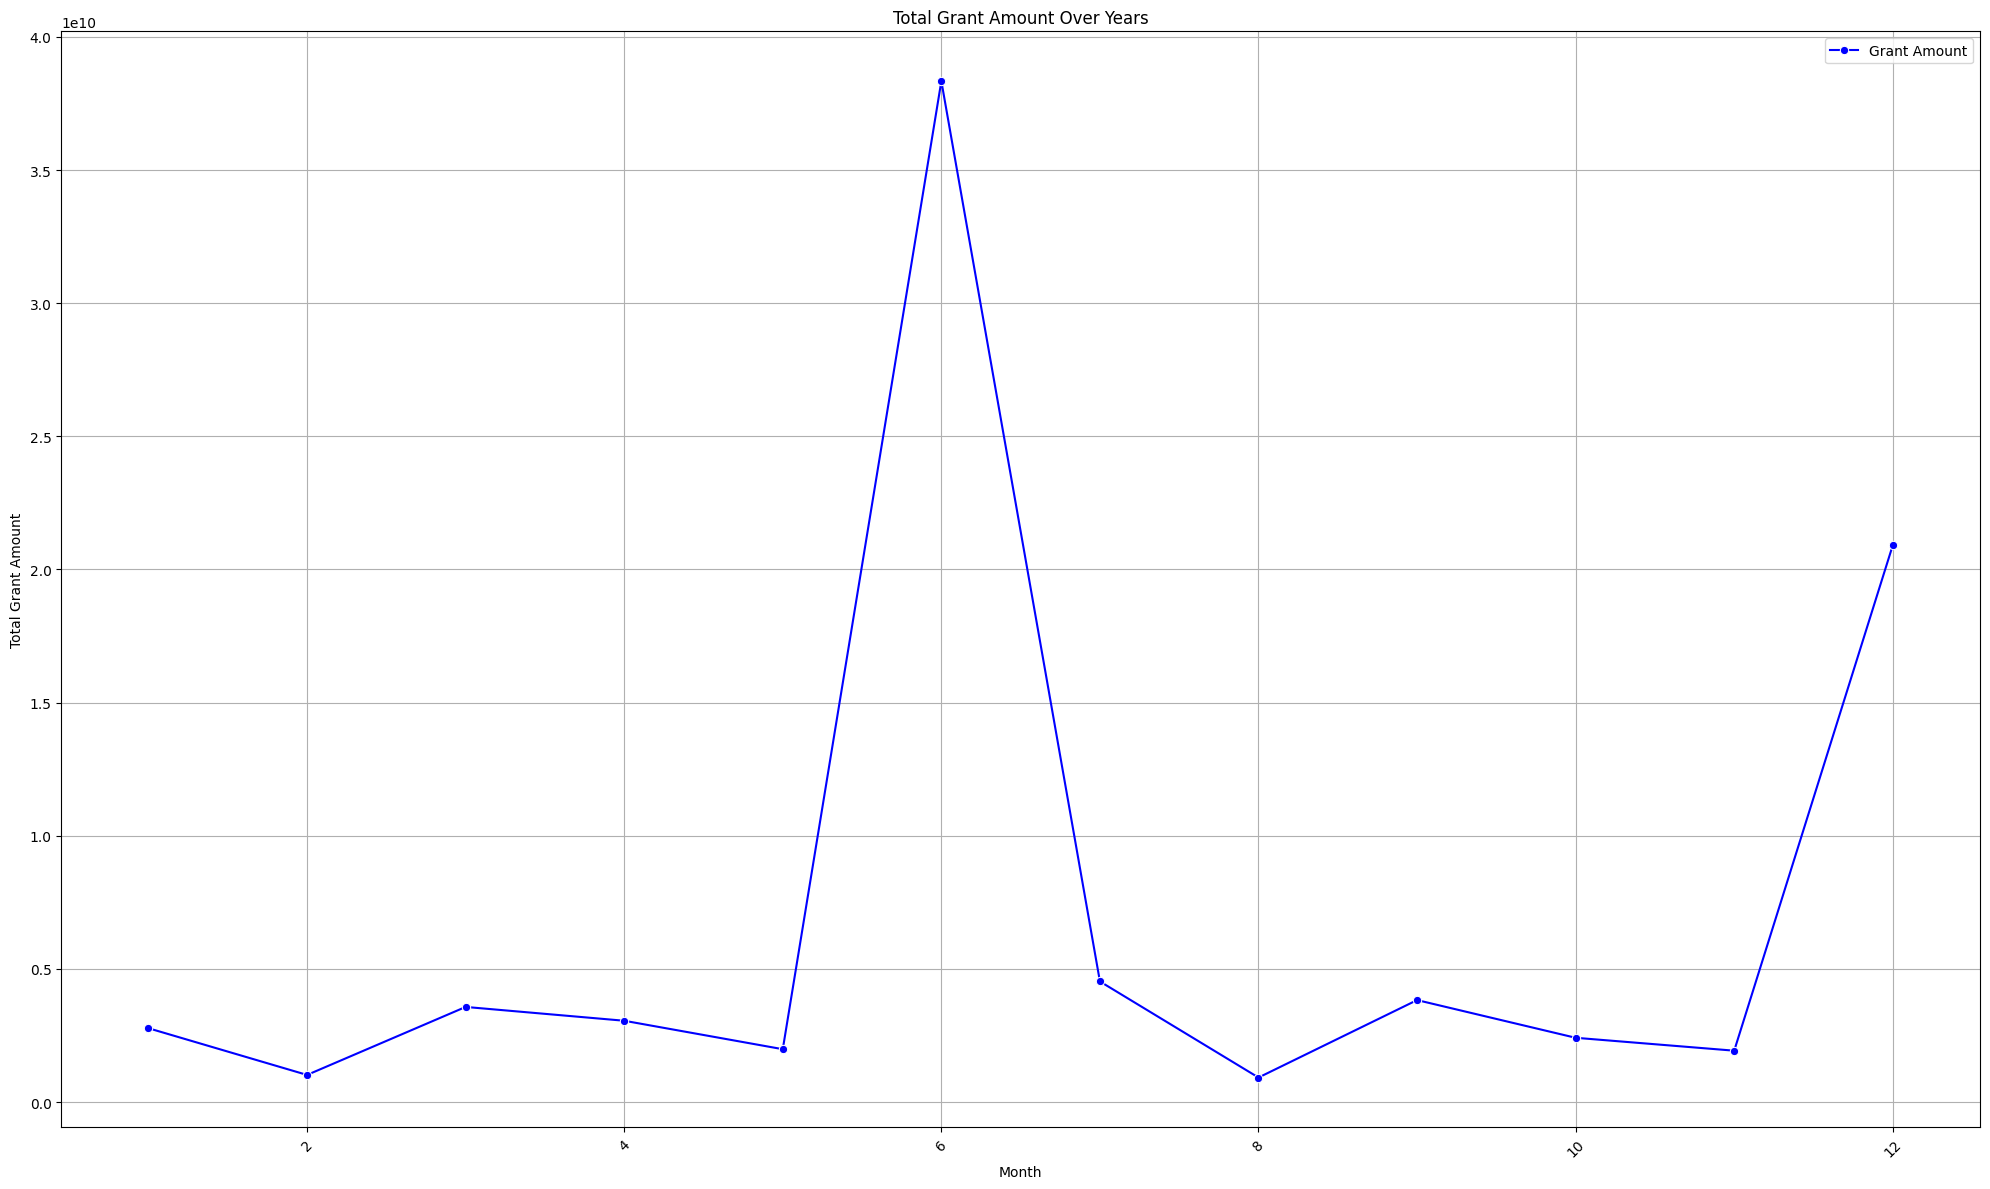

In [ ]:
plt.figure(figsize=(20, 12))
sns.lineplot(data=grouped_df2, x='Month', y='Grant Amount', marker='o', color='b', label='Grant Amount')
plt.title('Total Grant Amount Over Years')
plt.xlabel('Month')
plt.ylabel('Total Grant Amount')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
grouped_df3 = df.groupby('Day')['Grant Amount'].sum().reset_index()

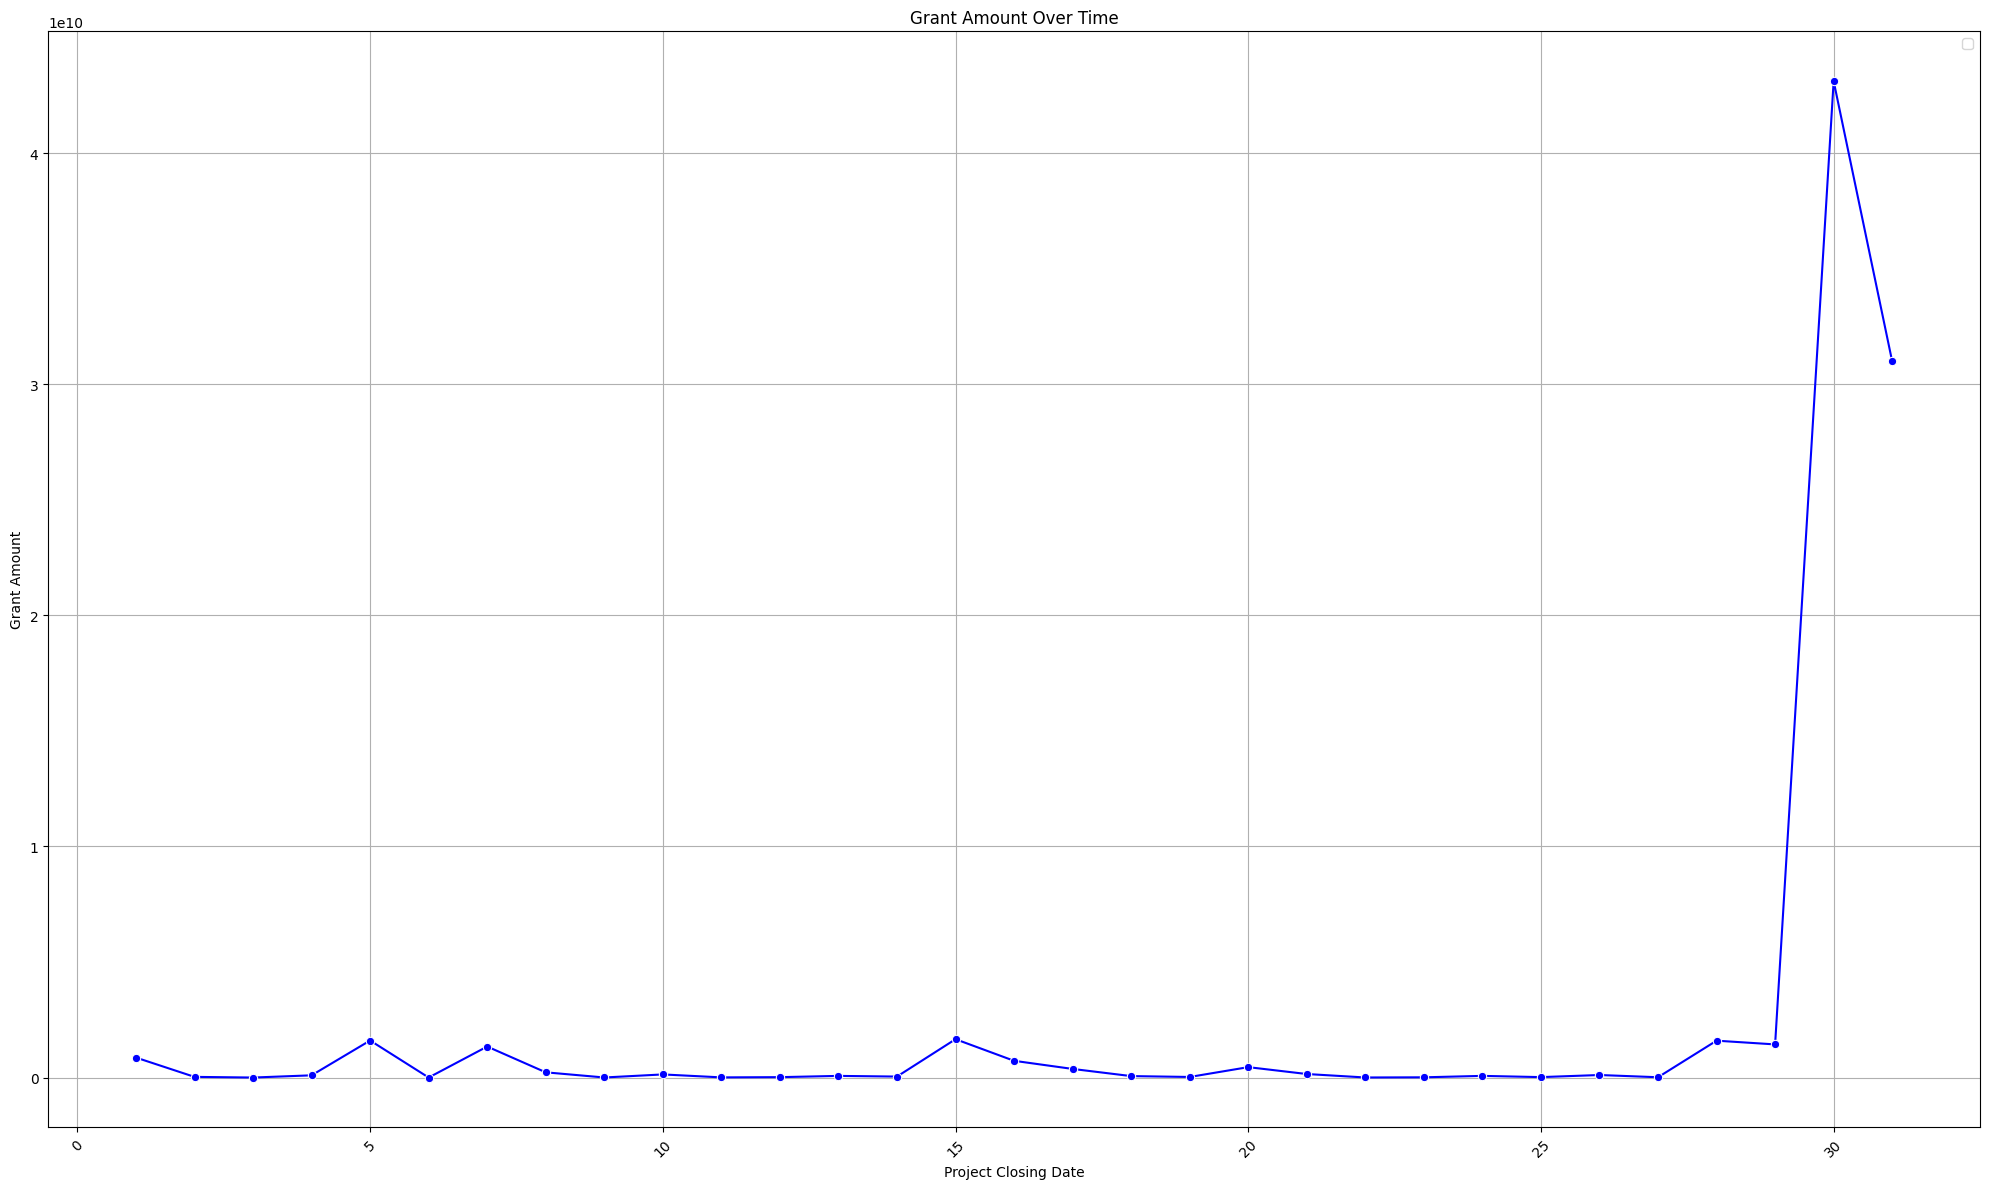

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 12))
sns.lineplot(data=grouped_df3, x='Day',y='Grant Amount',marker='o', color='b')
plt.title('Grant Amount Over Time')
plt.xlabel('Project Closing Date')
plt.ylabel('Grant Amount')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# 'Current Project Cost'

In [ ]:
projectCost = df.groupby('Year')['Current Project Cost'].sum().reset_index()

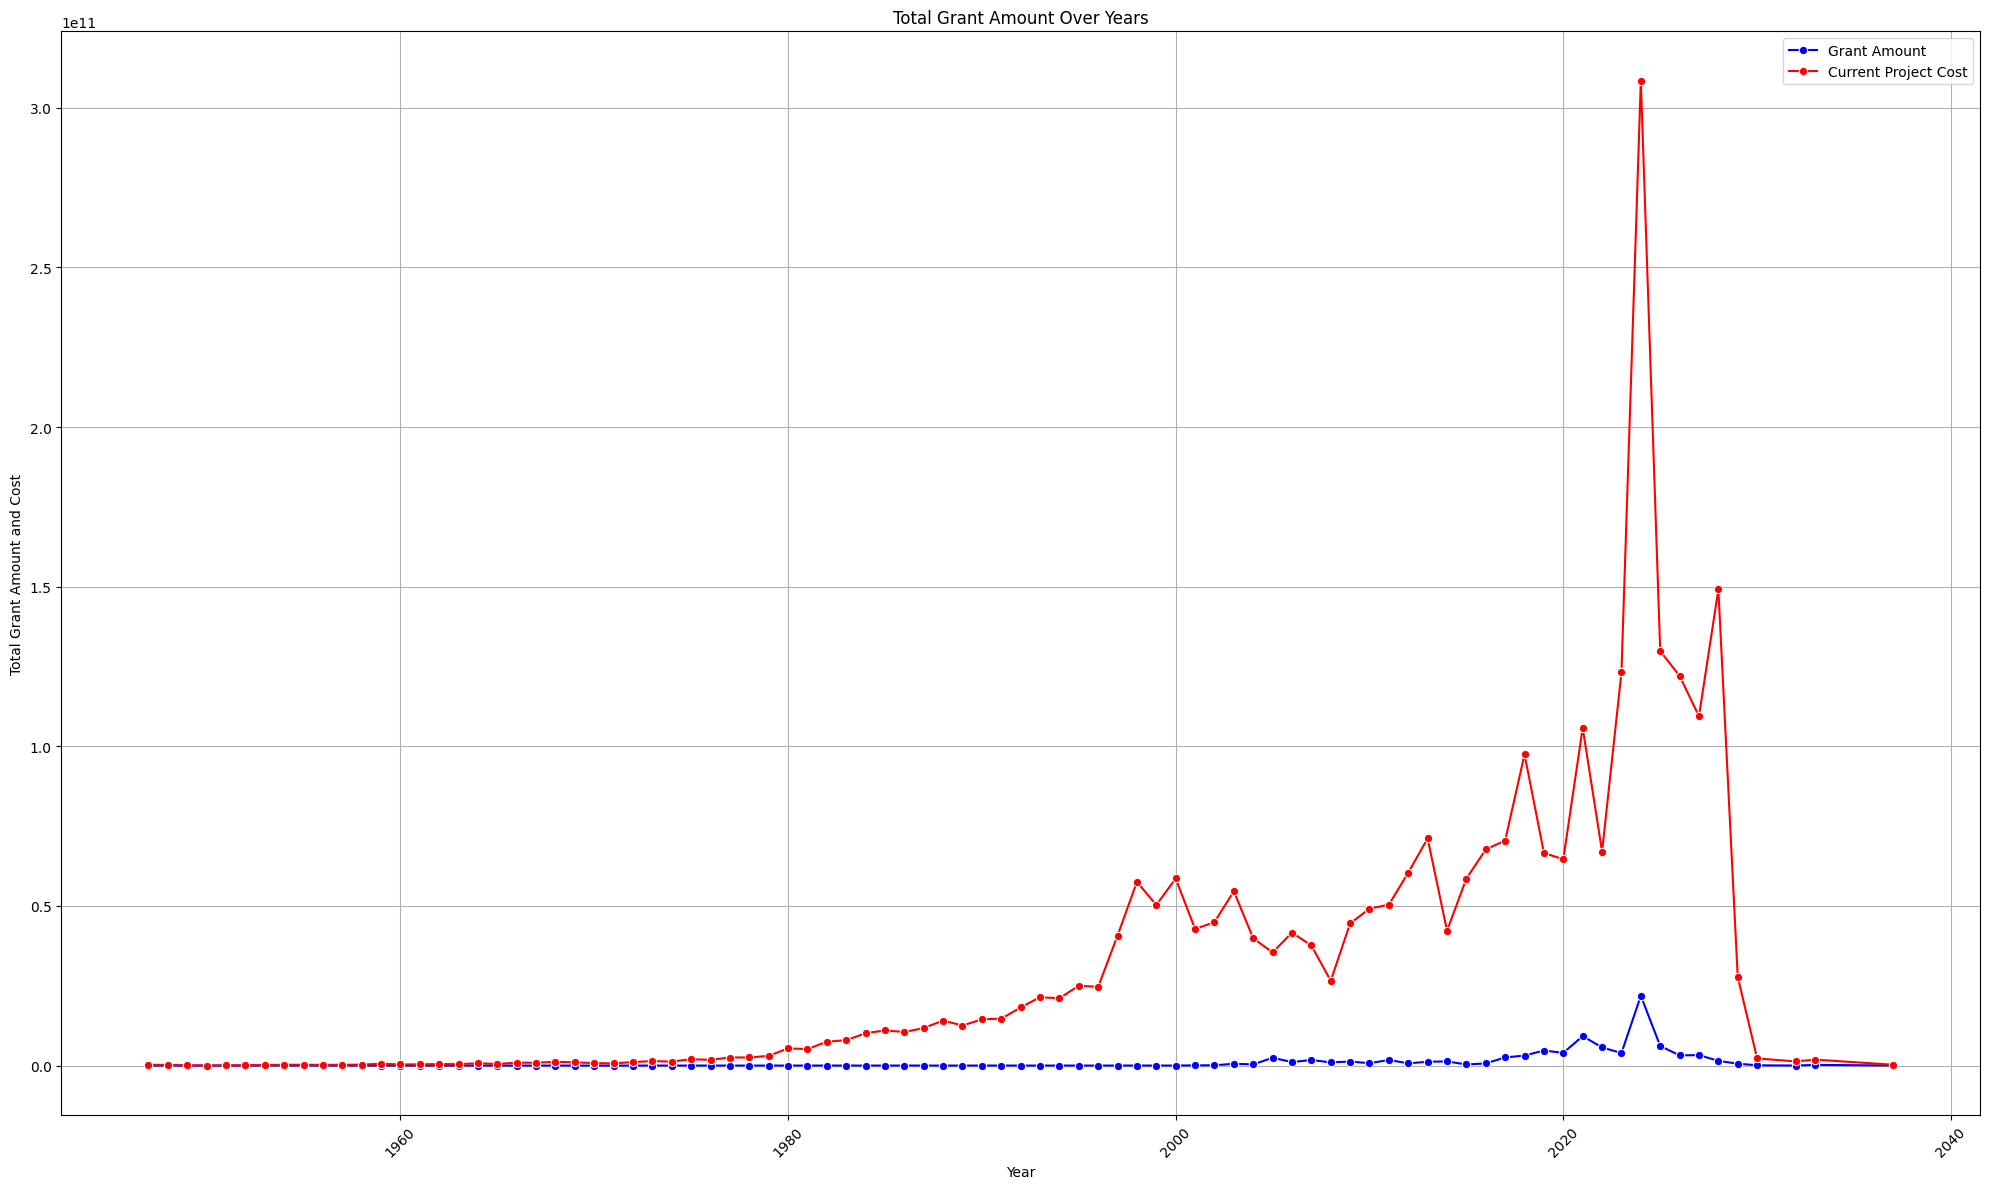

In [ ]:
plt.figure(figsize=(20, 12))
sns.lineplot(data=grouped_df, x='Year', y='Grant Amount', marker='o', color='b', label='Grant Amount')
sns.lineplot(data=projectCost, x='Year', y='Current Project Cost', marker='o', color='r', label='Current Project Cost')
plt.title('Total Grant Amount Over Years')
plt.xlabel('Year')
plt.ylabel('Total Grant Amount and Cost')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

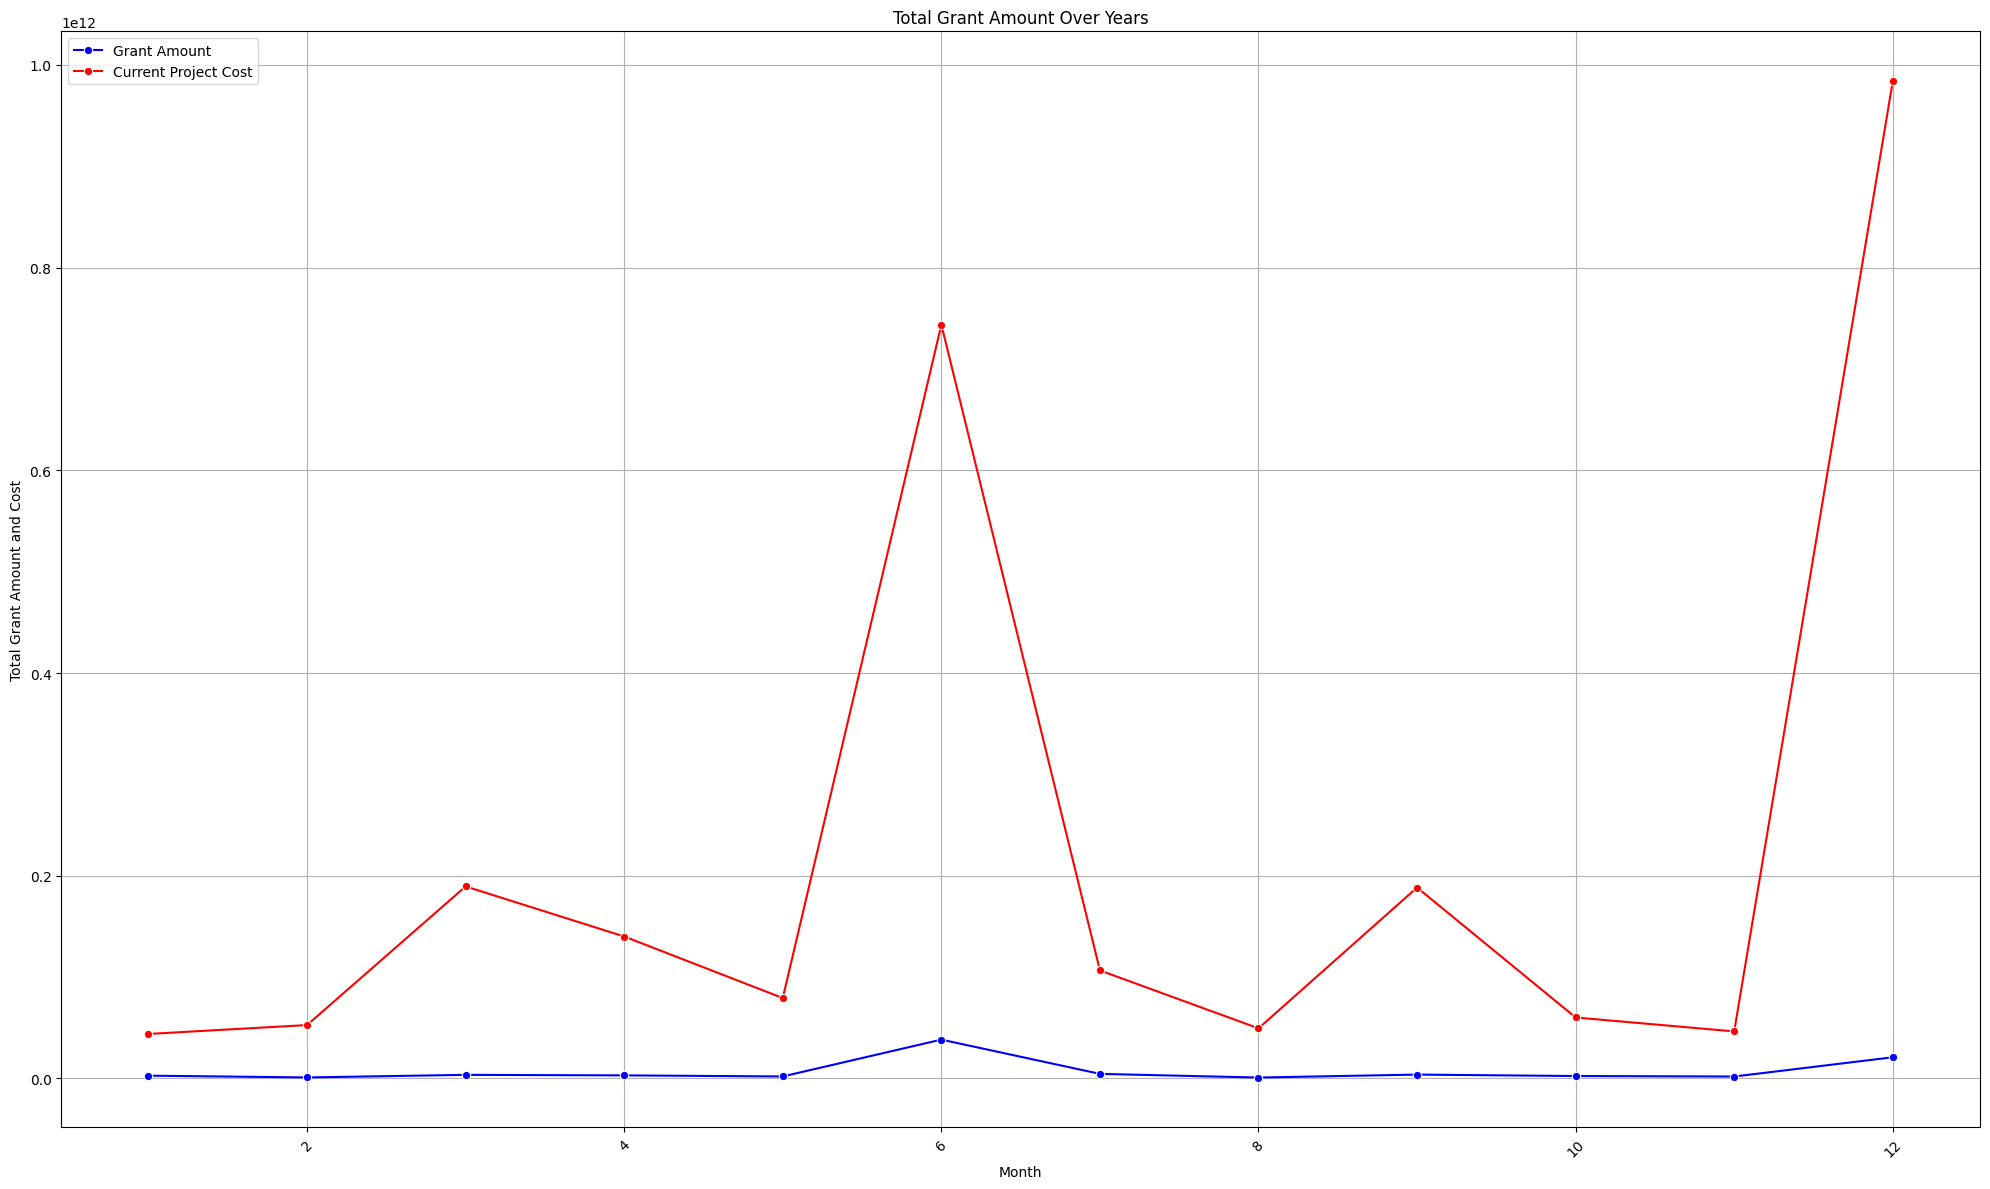

In [ ]:
projectCost2 = df.groupby('Month')['Current Project Cost'].sum().reset_index()
plt.figure(figsize=(20, 12))
sns.lineplot(data=grouped_df2, x='Month', y='Grant Amount', marker='o', color='b', label='Grant Amount')
sns.lineplot(data=projectCost2, x='Month', y='Current Project Cost', marker='o', color='r', label='Current Project Cost')
plt.title('Total Grant Amount Over Years')
plt.xlabel('Month')
plt.ylabel('Total Grant Amount and Cost')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
ContryDf = df.groupby('Region')['Grant Amount'].sum().reset_index()
spentDF = df.groupby('Region')['Current Project Cost'].sum().reset_index()

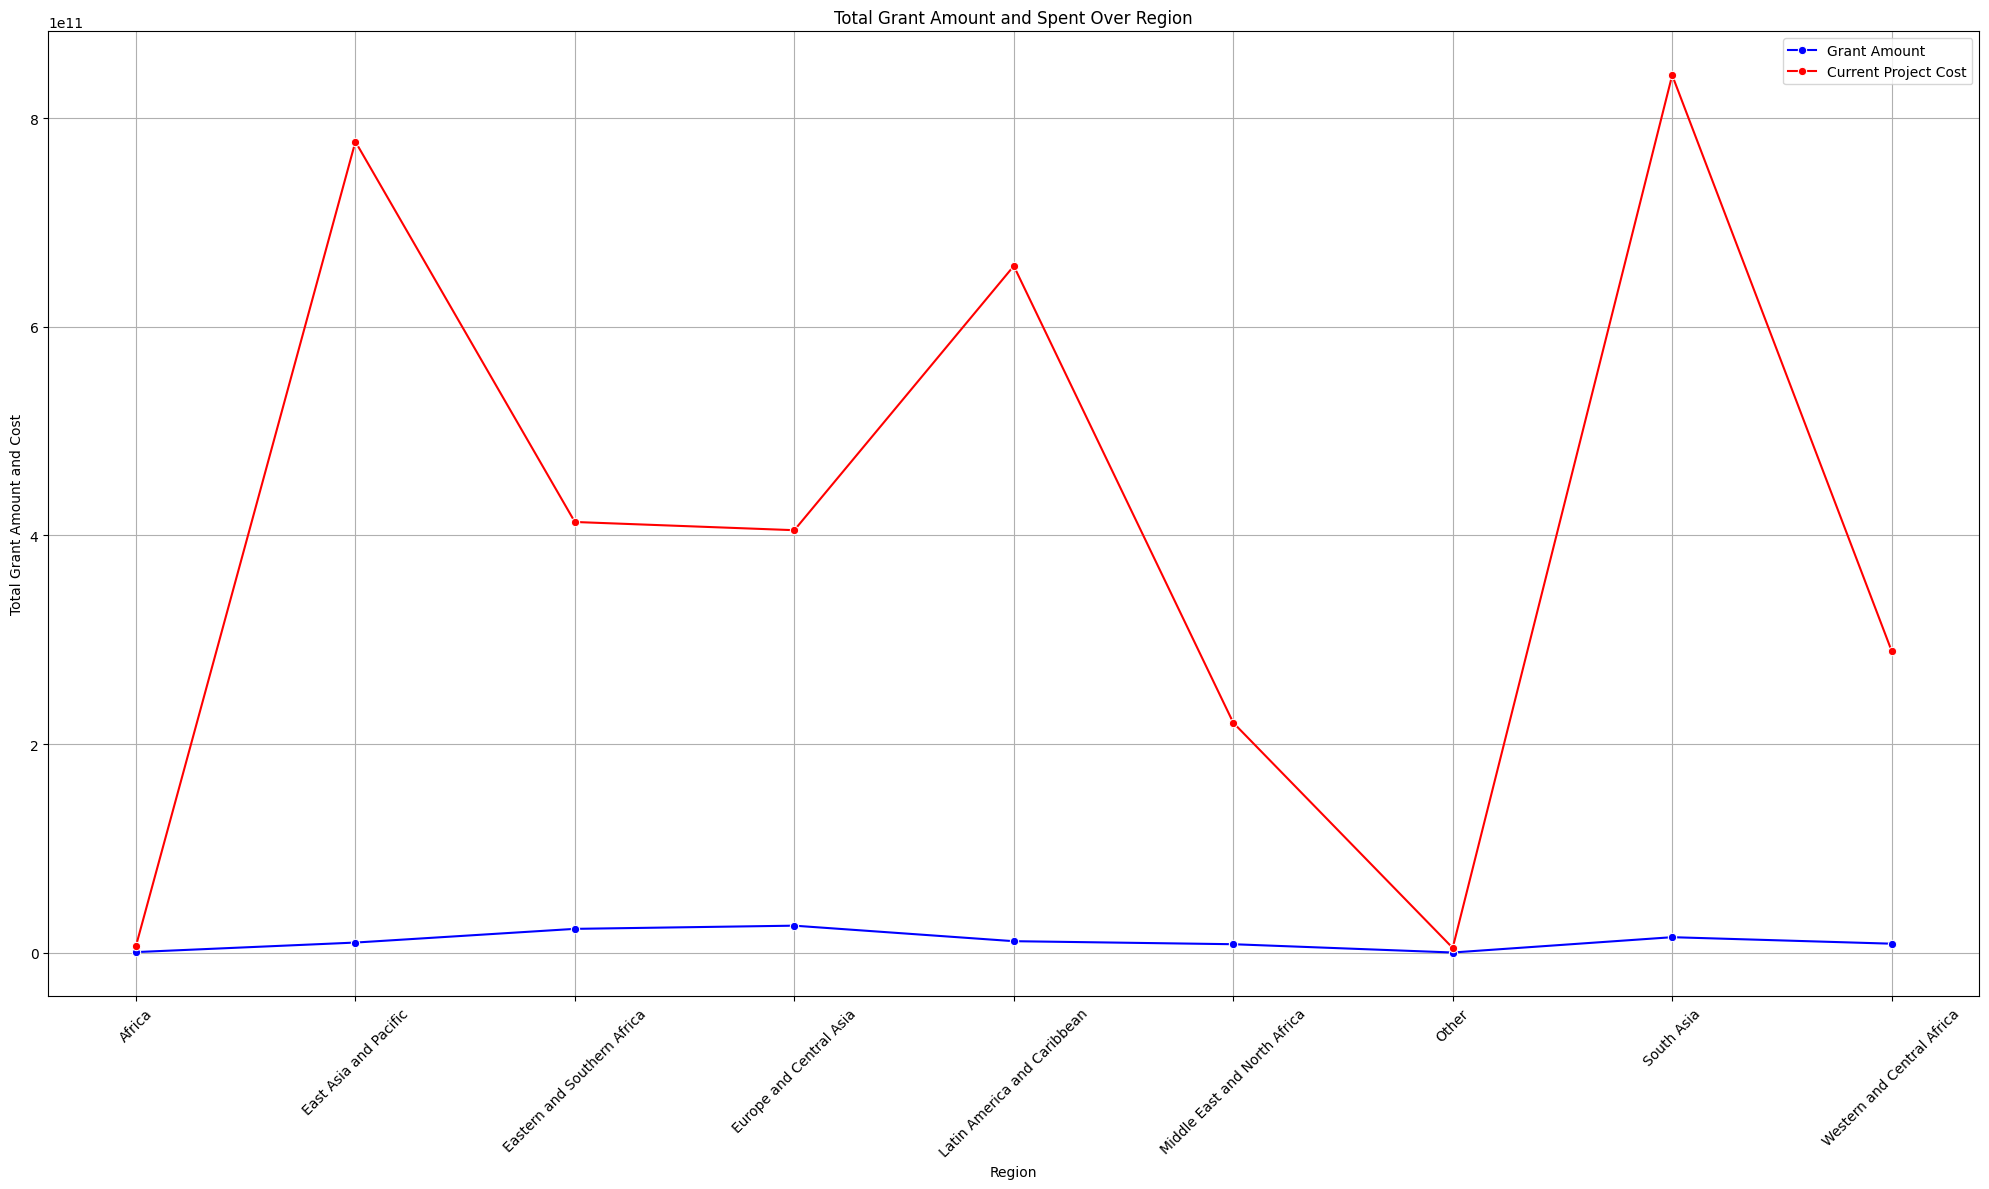

In [ ]:
plt.figure(figsize=(20, 12))
sns.lineplot(data=ContryDf, x='Region', y='Grant Amount', marker='o', color='b', label='Grant Amount')
sns.lineplot(data=spentDF, x='Region', y='Current Project Cost', marker='o', color='r', label='Current Project Cost')
plt.title('Total Grant Amount and Spent Over Region')
plt.xlabel('Region')
plt.ylabel('Total Grant Amount and Cost')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
ContryDf2 = df.groupby('Country')['Grant Amount'].sum().reset_index()
spentDF2 = df.groupby('Country')['Current Project Cost'].sum().reset_index()

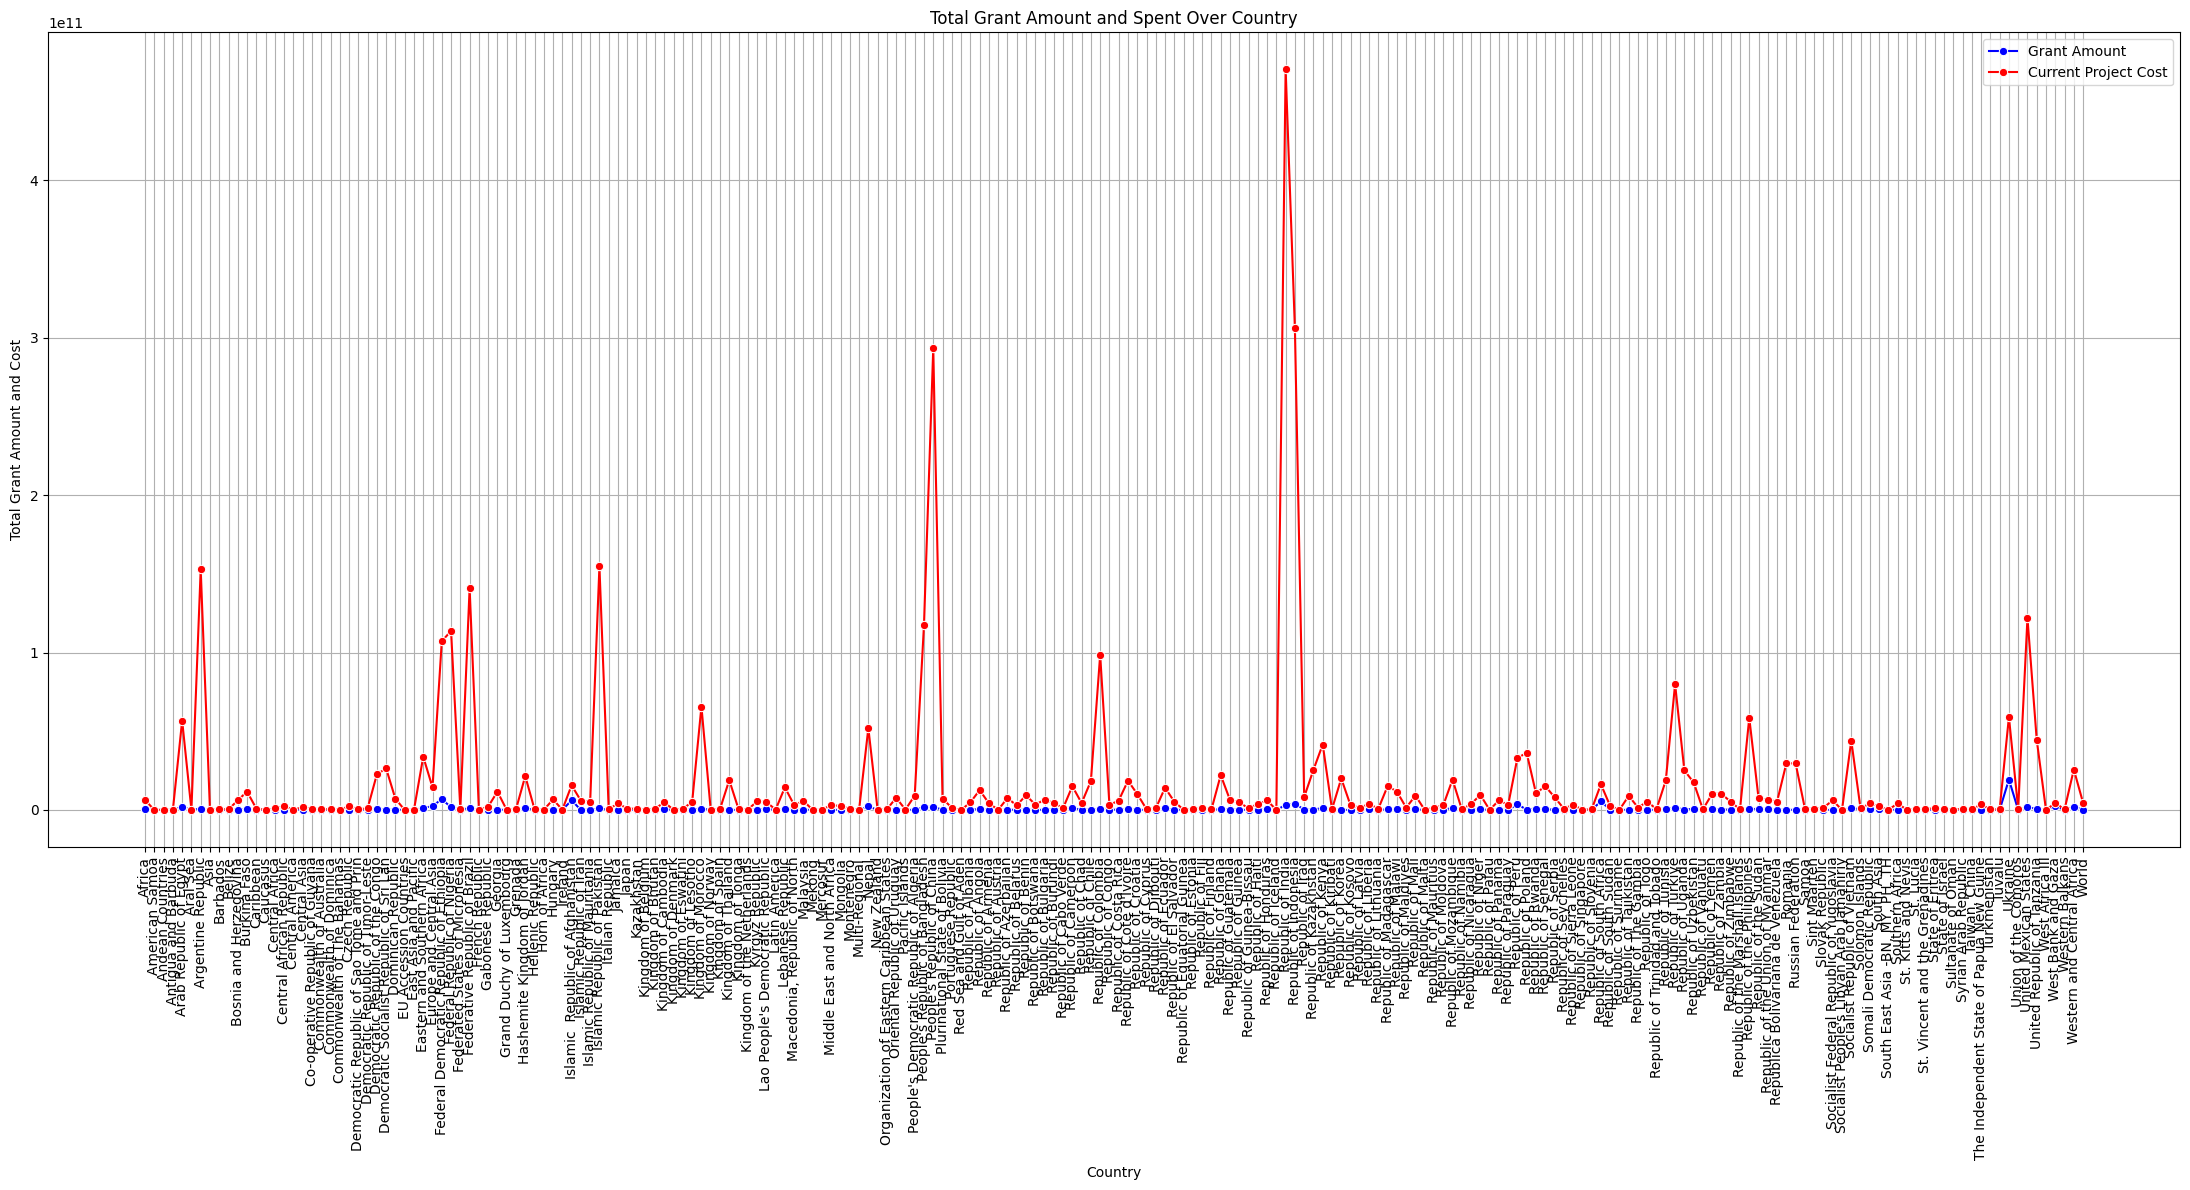

In [ ]:
plt.figure(figsize=(22, 12))
sns.lineplot(data=ContryDf2, x='Country', y='Grant Amount', marker='o', color='b', label='Grant Amount')
sns.lineplot(data=spentDF2, x='Country', y='Current Project Cost', marker='o', color='r', label='Current Project Cost')
plt.title('Total Grant Amount and Spent Over Country')
plt.xlabel('Country')
plt.ylabel('Total Grant Amount and Cost')
plt.legend()
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()